Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.2630 - val_loss: 0.0885
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0866 - val_loss: 0.0806
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - loss: 0.0804 - val_loss: 0.0773
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - loss: 0.0777 - val_loss: 0.0754
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 0.0759 - val_loss: 0.0743
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 0.0748 - val_loss: 0.0733
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 33ms/step - loss: 0.0738 - val_loss: 0.0725
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - loss: 0.0731 - val_loss: 0.0719
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0725 - val_loss: 0.0714
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0719 - val_loss: 0.0710


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - loss: 0.2865 - val_loss: 0.0835
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0822 - val_loss: 0.0771
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.0773 - val_loss: 0.0745
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 0.0748 - val_loss: 0.0729
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0734 - val_loss: 0.0719
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0725 - val_loss: 0.0712
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0717 - val_loss: 0.0707
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0713 - val_loss: 0.0702
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0708 - val_loss: 0.0702
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0706 - val_loss: 0.0698
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5

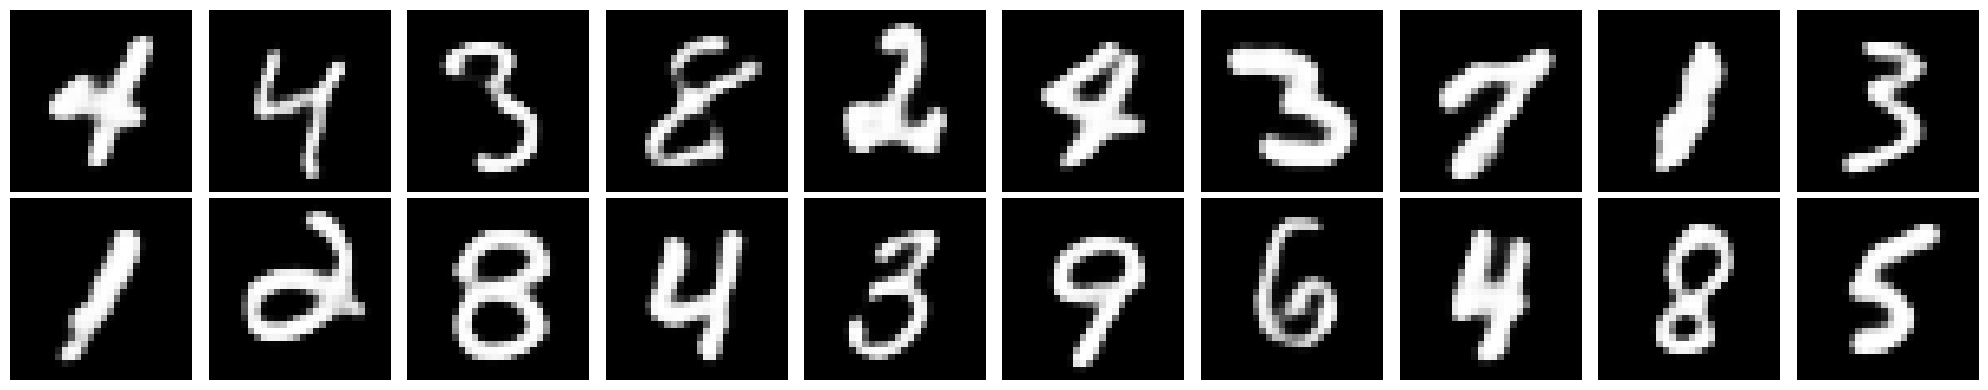

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model


(x_train, _), (x_test, _) = mnist.load_data()


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


def build_autoencoder(hidden_dim):
    input_img = Input(shape=(28, 28, 1))
    encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    encoded = MaxPooling2D((2, 2), padding='same')(encoded)
    encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    encoded = MaxPooling2D((2, 2), padding='same')(encoded)
    encoded = Conv2D(hidden_dim, (3, 3), activation='relu', padding='same')(encoded)
    
    decoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    decoded = UpSampling2D((2, 2))(decoded)
    decoded = Conv2D(16, (3, 3), activation='relu', padding='same')(decoded)
    decoded = UpSampling2D((2, 2))(decoded)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder


def train_autoencoder(hidden_dim, x_train, x_test):
    autoencoder = build_autoencoder(hidden_dim)
    autoencoder.fit(x_train, x_train,
                    epochs=10,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(x_test, x_test))
    
  
    autoencoder.save(f'autoencoder_model_hd{hidden_dim}.keras')
    
   
    train_reconstructions = autoencoder.predict(x_train)
    train_errors = np.mean(np.square(x_train - train_reconstructions))
    
    test_reconstructions = autoencoder.predict(x_test)
    test_errors = np.mean(np.square(x_test - test_reconstructions))
    
    return train_errors, test_errors, train_reconstructions, test_reconstructions


hidden_dims = [32, 64]
results = {}

for hidden_dim in hidden_dims:
    train_error, test_error, train_reconstructions, test_reconstructions = train_autoencoder(hidden_dim, x_train, x_test)
    results[hidden_dim] = {
        'train_error': train_error,
        'test_error': test_error,
        'train_reconstructions': train_reconstructions,
        'test_reconstructions': test_reconstructions
    }


for hidden_dim, result in results.items():
    print(f"Hidden Dimension: {hidden_dim}")
    print(f"Train Reconstruction Error: {result['train_error']}")
    print(f"Test Reconstruction Error: {result['test_error']}")


n_samples = 10
plt.figure(figsize=(20, 4))
for hidden_dim, result in results.items():
    print(f"\nReconstructions for Hidden Dimension: {hidden_dim}")
    train_reconstructions = result['train_reconstructions']
    test_reconstructions = result['test_reconstructions']
    
    train_indices = np.random.choice(len(x_train), size=n_samples, replace=False)
    test_indices = np.random.choice(len(x_test), size=n_samples, replace=False)
    
    print("Train Data Reconstructions:")
    for i, idx in enumerate(train_indices):
        plt.subplot(2, n_samples, i + 1)
        plt.imshow(train_reconstructions[idx].reshape(28, 28), cmap='gray')
        plt.axis('off')
    
    print("Test Data Reconstructions:")
    for i, idx in enumerate(test_indices):
        plt.subplot(2, n_samples, n_samples + i + 1)
        plt.imshow(test_reconstructions[idx].reshape(28, 28), cmap='gray')
        plt.axis('off')
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  


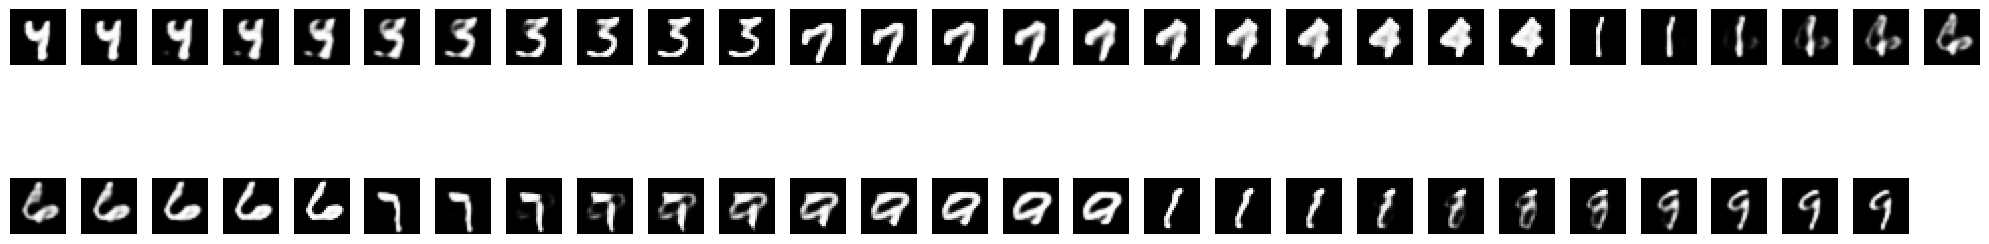

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model


(_, _), (x_test, _) = mnist.load_data()
x_test = x_test.astype('float32') / 255.
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


autoencoder = load_model('autoencoder_model_hd32.keras')


sample_indices = np.random.choice(len(x_test), size=10, replace=False)
encoded_samples = []
for i in range(0, 9, 2):  # Considering 5 pairs of samples
    sample1 = x_test[sample_indices[i]].reshape(1, 28, 28, 1)
    sample2 = x_test[sample_indices[i+1]].reshape(1, 28, 28, 1)
    
    encoded_sample1 = autoencoder.predict(sample1)
    encoded_sample2 = autoencoder.predict(sample2)
    
    
    n_steps = 10
    interpolated_points = []
    for j in range(n_steps + 1):
        alpha = j / n_steps
        interpolated_point = alpha * encoded_sample1 + (1 - alpha) * encoded_sample2
        interpolated_points.append(interpolated_point)
    
    encoded_samples.extend(interpolated_points)


encoded_samples = np.array(encoded_samples).reshape(-1, *encoded_sample1.shape[1:])

reconstructed_images = autoencoder.predict(encoded_samples)


plt.figure(figsize=(20, 4))
n_samples = len(reconstructed_images)
for i, image in enumerate(reconstructed_images):
    plt.subplot(2, (n_samples + 1) // 2, i + 1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


## Observations
1. Both models achieve low reconstruction errors on both the training and test datasets, indicating good performance in reconstructing images.
2. The model with a hidden dimension of 64 achieves slightly lower reconstruction errors compared to the model with a hidden dimension of 32 on both the training and test datasets
3. Increasing the dimensionality of the hidden layer  allows the autoencoder to capture more complex features and variations in the data, resulting in slightly improved reconstruction performance.



Train Epoch: 1 [0/60000 (0%)]	Loss: 525.956299
Train Epoch: 1 [12800/60000 (21%)]	Loss: 199.229034
Train Epoch: 1 [25600/60000 (43%)]	Loss: 176.520157
Train Epoch: 1 [38400/60000 (64%)]	Loss: 143.131592
Train Epoch: 1 [51200/60000 (85%)]	Loss: 128.197479
====> Epoch: 1 Average loss: 177.4068
====> Test set loss: 121.5689
Train Epoch: 2 [0/60000 (0%)]	Loss: 126.551575
Train Epoch: 2 [12800/60000 (21%)]	Loss: 115.651688
Train Epoch: 2 [25600/60000 (43%)]	Loss: 114.239708
Train Epoch: 2 [38400/60000 (64%)]	Loss: 115.971970
Train Epoch: 2 [51200/60000 (85%)]	Loss: 115.252174
====> Epoch: 2 Average loss: 116.4076
====> Test set loss: 111.2765
Train Epoch: 3 [0/60000 (0%)]	Loss: 112.106377
Train Epoch: 3 [12800/60000 (21%)]	Loss: 112.409035
Train Epoch: 3 [25600/60000 (43%)]	Loss: 111.901001
Train Epoch: 3 [38400/60000 (64%)]	Loss: 110.085274
Train Epoch: 3 [51200/60000 (85%)]	Loss: 106.637009
====> Epoch: 3 Average loss: 110.7224
====> Test set loss: 108.4400
Train Epoch: 4 [0/60000 (0%)]	L

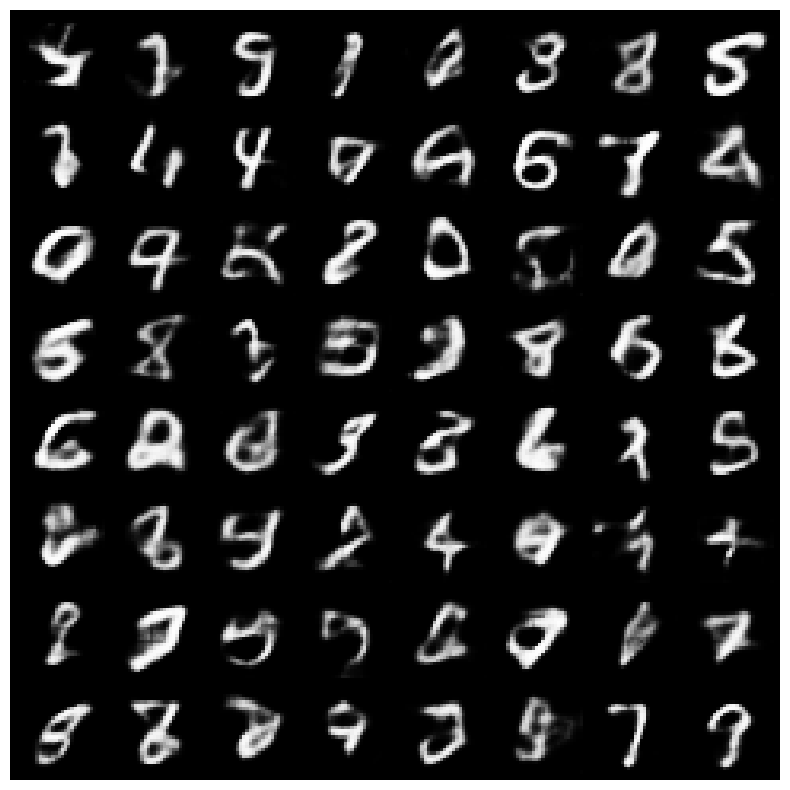

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms, utils
import torchvision


class VAE(nn.Module):
    def __init__(self, input_shape, latent_dim):
        super(VAE, self).__init__()
        self.input_shape = input_shape
        self.latent_dim = latent_dim

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(input_shape[0], 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )
        self.fc_mu = nn.Linear(64 * (input_shape[1] // 4) * (input_shape[2] // 4), latent_dim)
        self.fc_logvar = nn.Linear(64 * (input_shape[1] // 4) * (input_shape[2] // 4), latent_dim)

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64 * (input_shape[1] // 4) * (input_shape[2] // 4)),
            nn.ReLU(),
            nn.Unflatten(-1, (64, input_shape[1] // 4, input_shape[2] // 4)),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, input_shape[0], kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        # Encode
        x = self.encoder(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        z = self.reparameterize(mu, logvar)

        # Decode
        x_recon = self.decoder(z)
        return x_recon, mu, logvar


def loss_function(x_recon, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(x_recon, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD


def train(model, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item() / len(data)))
    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))


def test(model, test_loader):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for data, _ in test_loader:
            recon_batch, mu, logvar = model(data)
            test_loss += loss_function(recon_batch, data, mu, logvar).item()
    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))


batch_size = 128
train_loader = DataLoader(datasets.MNIST('./data', train=True, download=True, transform=transforms.ToTensor()),
                          batch_size=batch_size, shuffle=True)
test_loader = DataLoader(datasets.MNIST('./data', train=False, transform=transforms.ToTensor()),
                         batch_size=batch_size, shuffle=False)


latent_dim = 20
input_shape = (1, 28, 28)
model = VAE(input_shape, latent_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Train the model
epochs = 10
for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)



with torch.no_grad():
    sample = torch.randn(64, latent_dim)
    sample = model.decoder(sample).cpu()
    utils.save_image(sample.view(64, 1, 28, 28), './sample_vae.png')  


sample = torchvision.utils.make_grid(sample, nrow=8, padding=2, normalize=True)
sample_np = sample.numpy()

plt.figure(figsize=(10, 10))
plt.imshow(np.transpose(sample_np, (1, 2, 0)))
plt.axis('off')
plt.show()


## Observations
1. The training and test set loss consistently decrease over the ten epochs, indicating effective learning and convergence.
2. This reduction in loss suggests that the model is successfully capturing meaningful latent representations.
3. Visual inspection of generated samples helps evaluate image sharpness, clarity, and resemblance to original inputs.